In [2]:
'''Basic Modules'''
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns                   
sns.set_style("whitegrid")

In [3]:
df_export = pd.read_csv('2018-2010_export.csv')
df_import = pd.read_csv('2018-2010_import.csv')

In [4]:
print('**Preview of Export Data:**')
display(df_export.sample(n=5))
print('**Preview of Import Data:**')
display(df_import.sample(n=5))

**Preview of Export Data:**


,HSCode,Commodity,value,country,year
120775,9,"COFFEE, TEA, MATE AND SPICES.",0.13,TOGO,2011
36009,61,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...",0.16,FR POLYNESIA,2016
62263,49,"PRINTED BOOKDS, NEWSPAPERS, PICTURES AND OTHER...",0.43,ANGOLA,2014
46950,82,"TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, O...",0.02,ANDORRA,2015
29493,56,"WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TW...",0.00,TAJIKISTAN,2017


**Preview of Import Data:**


,HSCode,Commodity,value,country,year
27771,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.00,COTE D' IVOIRE,2015
42268,24,TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES.,0.00,UNSPECIFIED,2014
41059,63,OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLO...,NaN,ST KITT N A,2014
15815,52,COTTON.,0.95,TAJIKISTAN,2017
73629,70,GLASS AND GLASSWARE.,0.00,PUERTO RICO,2010


# Description of Import Export Data and Data Cleaning

In [5]:
def description(df) :
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

In [6]:
print('**Variable Description of export dataset:**')
display(description(df_export))

print('**Variable Description of import dataset:**')
display(description(df_import))


**Variable Description of export dataset:**


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,98,2,3,4
1,Commodity,object,0,98,MEAT AND EDIBLE MEAT OFFAL.,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...
2,value,float64,14038,10687,0.18,0,12.48
3,country,object,0,248,AFGHANISTAN TIS,AFGHANISTAN TIS,AFGHANISTAN TIS
4,year,int64,0,9,2018,2018,2018


**Variable Description of import dataset:**


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,98,5,7,8
1,Commodity,object,0,98,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...
2,value,float64,11588,9015,0,12.38,268.6
3,country,object,0,242,AFGHANISTAN TIS,AFGHANISTAN TIS,AFGHANISTAN TIS
4,year,int64,0,9,2018,2018,2018


In [7]:
"""Let's see if export and import data contain the zero and NAN values """
print('**Export Data with zeros:**')
display(df_export[df_export.value == 0].head(5))
print('**Import Data with zeros:**')
display(df_import[df_import.value == 0].head(5))
print('**Export Data with NAN:**')
display(df_export.isnull().sum())
print('**Import Data with NAN:**')
display(df_import.isnull().sum())

**Export Data with zeros:**


,HSCode,Commodity,value,country,year
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.0,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.0,AFGHANISTAN TIS,2018
14,18,COCOA AND COCOA PREPARATIONS.,0.0,AFGHANISTAN TIS,2018
26,31,FERTILISERS.,0.0,AFGHANISTAN TIS,2018
32,37,PHOTOGRAPHIC OR CINEMATOGRAPHIC GOODS.,0.0,AFGHANISTAN TIS,2018


**Import Data with zeros:**


,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.0,AFGHANISTAN TIS,2018
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.0,AFGHANISTAN TIS,2018
11,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,0.0,AFGHANISTAN TIS,2018
20,81,OTHER BASE METALS; CERMETS; ARTICLES THEREOF.,0.0,AFGHANISTAN TIS,2018
22,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",0.0,AFGHANISTAN TIS,2018


**Export Data with NAN:**


HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

**Import Data with NAN:**


HSCode           0
Commodity        0
value        11588
country          0
year             0
dtype: int64

In [8]:
df_export=df_export.dropna()
df_export=df_export.reset_index(drop=True)

df_import=df_import.dropna()
df_export=df_export.reset_index(drop=True)

# Year Wise Analysis:

In [9]:
exp_year=df_export.groupby('year').agg({'value': 'sum'})
exp_year = exp_year.rename(columns={'value': 'Export'})

imp_year=df_import.groupby('year').agg({'value': 'sum'})
imp_year = imp_year.rename(columns={'value': 'Import'})


exp_year['Growth Rate(E)'] = exp_year.pct_change()
imp_year['Growth Rate(I)'] = imp_year.pct_change()


total_year = pd.concat([exp_year, imp_year], axis = 1)
total_year['Trade Deficit'] = exp_year.Export - imp_year.Import


print('**Export/Import and Trade Balance of India**')
display(total_year)

**Export/Import and Trade Balance of India**


,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
year,,,,,
2010,249801.18,NaN,369762.25,NaN,-119961.07
2011,305948.28,0.224767,489311.81,0.323315,-183363.53
2012,300384.32,-0.018186,490730.07,0.002898,-190345.75
2013,314388.61,0.046621,450192.99,-0.082606,-135804.38
2014,310321.02,-0.012938,448026.63,-0.004812,-137705.61
2015,262274.30,-0.154829,412537.53,-0.079212,-150263.23
2016,275835.27,0.051705,384350.29,-0.068326,-108515.02
2017,303507.85,0.100323,465574.02,0.211327,-162066.17
2018,330058.64,0.087480,514071.33,0.104167,-184012.69


In [10]:
display(total_year.describe())

,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
count,9.000000,8.000000,9.000000,8.000000,9.000000
mean,294724.385556,0.040618,447172.991111,0.050844,-152448.605556
std,26318.974416,0.109777,49542.234081,0.149838,29507.365644
min,249801.180000,-0.154829,369762.250000,-0.082606,-190345.750000
25%,275835.270000,-0.014250,412537.530000,-0.071048,-183363.530000
50%,303507.850000,0.049163,450192.990000,-0.000957,-150263.230000
75%,310321.020000,0.090691,489311.810000,0.130957,-135804.380000
max,330058.640000,0.224767,514071.330000,0.323315,-108515.020000


Text(0, 0.5, 'USD (millions)')

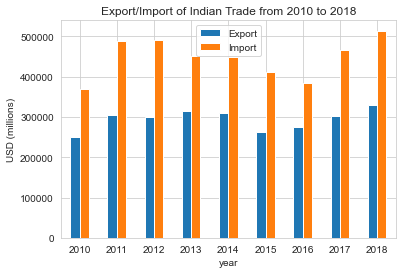

In [11]:
x = total_year.Export
y = total_year.Import

df = pd.DataFrame({'Export': x,
                   'Import': y}, index=total_year.index)
ax = df.plot.bar(rot=0)
ax.set_title("Export/Import of Indian Trade from 2010 to 2018")
ax.set_ylabel('USD (millions)')

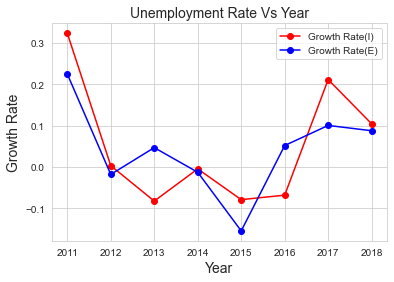

In [13]:
import matplotlib.pyplot as plt
plt.plot(total_year.index, total_year['Growth Rate(I)'], color='red', marker='o')
plt.plot(total_year.index, total_year['Growth Rate(E)'], color='blue', marker='o')
plt.legend(labels=('Growth Rate(I)', 'Growth Rate(E)'),loc='upper right')
plt.title('Unemployment Rate Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Growth Rate', fontsize=14)
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Export/Import and Trade Deficit of Indian Trade from 2010 to 2018')

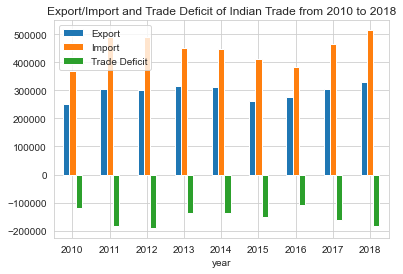

In [15]:
x = total_year.Export
y = total_year.Import
z= total_year['Trade Deficit']
df = pd.DataFrame({'Export': x,
                   'Import': y , 'Trade Deficit':z}, index=total_year.index)
ax = df.plot.bar(rot=0)
ax.set_title("Export/Import and Trade Deficit of Indian Trade from 2010 to 2018")

# Commodity Wise Analysis

In [16]:
print('Total number of Export commodity:', df_export['Commodity'].nunique())
print('Total number of Import commodity:', df_import['Commodity'].nunique())

Total number of Export commodity: 98
Total number of Import commodity: 98


In [17]:
print('Most Exporting Commodities(In Numbers) from 2010 to 2018')
display(pd.DataFrame(df_export['Commodity'].value_counts().head(20)))
print('Most Importing Commodities(In Numbers) from 2010 to 2018')
display(pd.DataFrame(df_import['Commodity'].value_counts().head(20)))

Most Exporting Commodities(In Numbers) from 2010 to 2018


,Commodity
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1882
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1878
PHARMACEUTICAL PRODUCTS,1876
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1849
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",1817
PLASTIC AND ARTICLES THEREOF.,1809
ARTICLES OF IRON OR STEEL,1797
OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS,1791
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",1788
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, KNITTED OR CORCHETED.",1741


Most Importing Commodities(In Numbers) from 2010 to 2018


,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1576
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1504
IRON AND STEEL,1378
PLASTIC AND ARTICLES THEREOF.,1295
ALUMINIUM AND ARTICLES THEREOF.,1289
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1203
COPPER AND ARTICLES THEREOF.,1117
ARTICLES OF IRON OR STEEL,1099
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,1072
RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER,1043


In [18]:
'''Coverting dataset in commodity wise'''
exp_comm = df_export.groupby('Commodity').agg({'value':'sum'})
exp_comm = exp_comm.sort_values(by = 'value', ascending = False)
exp_comm = exp_comm[:20]

imp_comm = df_import.groupby('Commodity').agg({'value':'sum'})
imp_comm = imp_comm.sort_values(by = 'value', ascending = False)
imp_comm = imp_comm[:20]

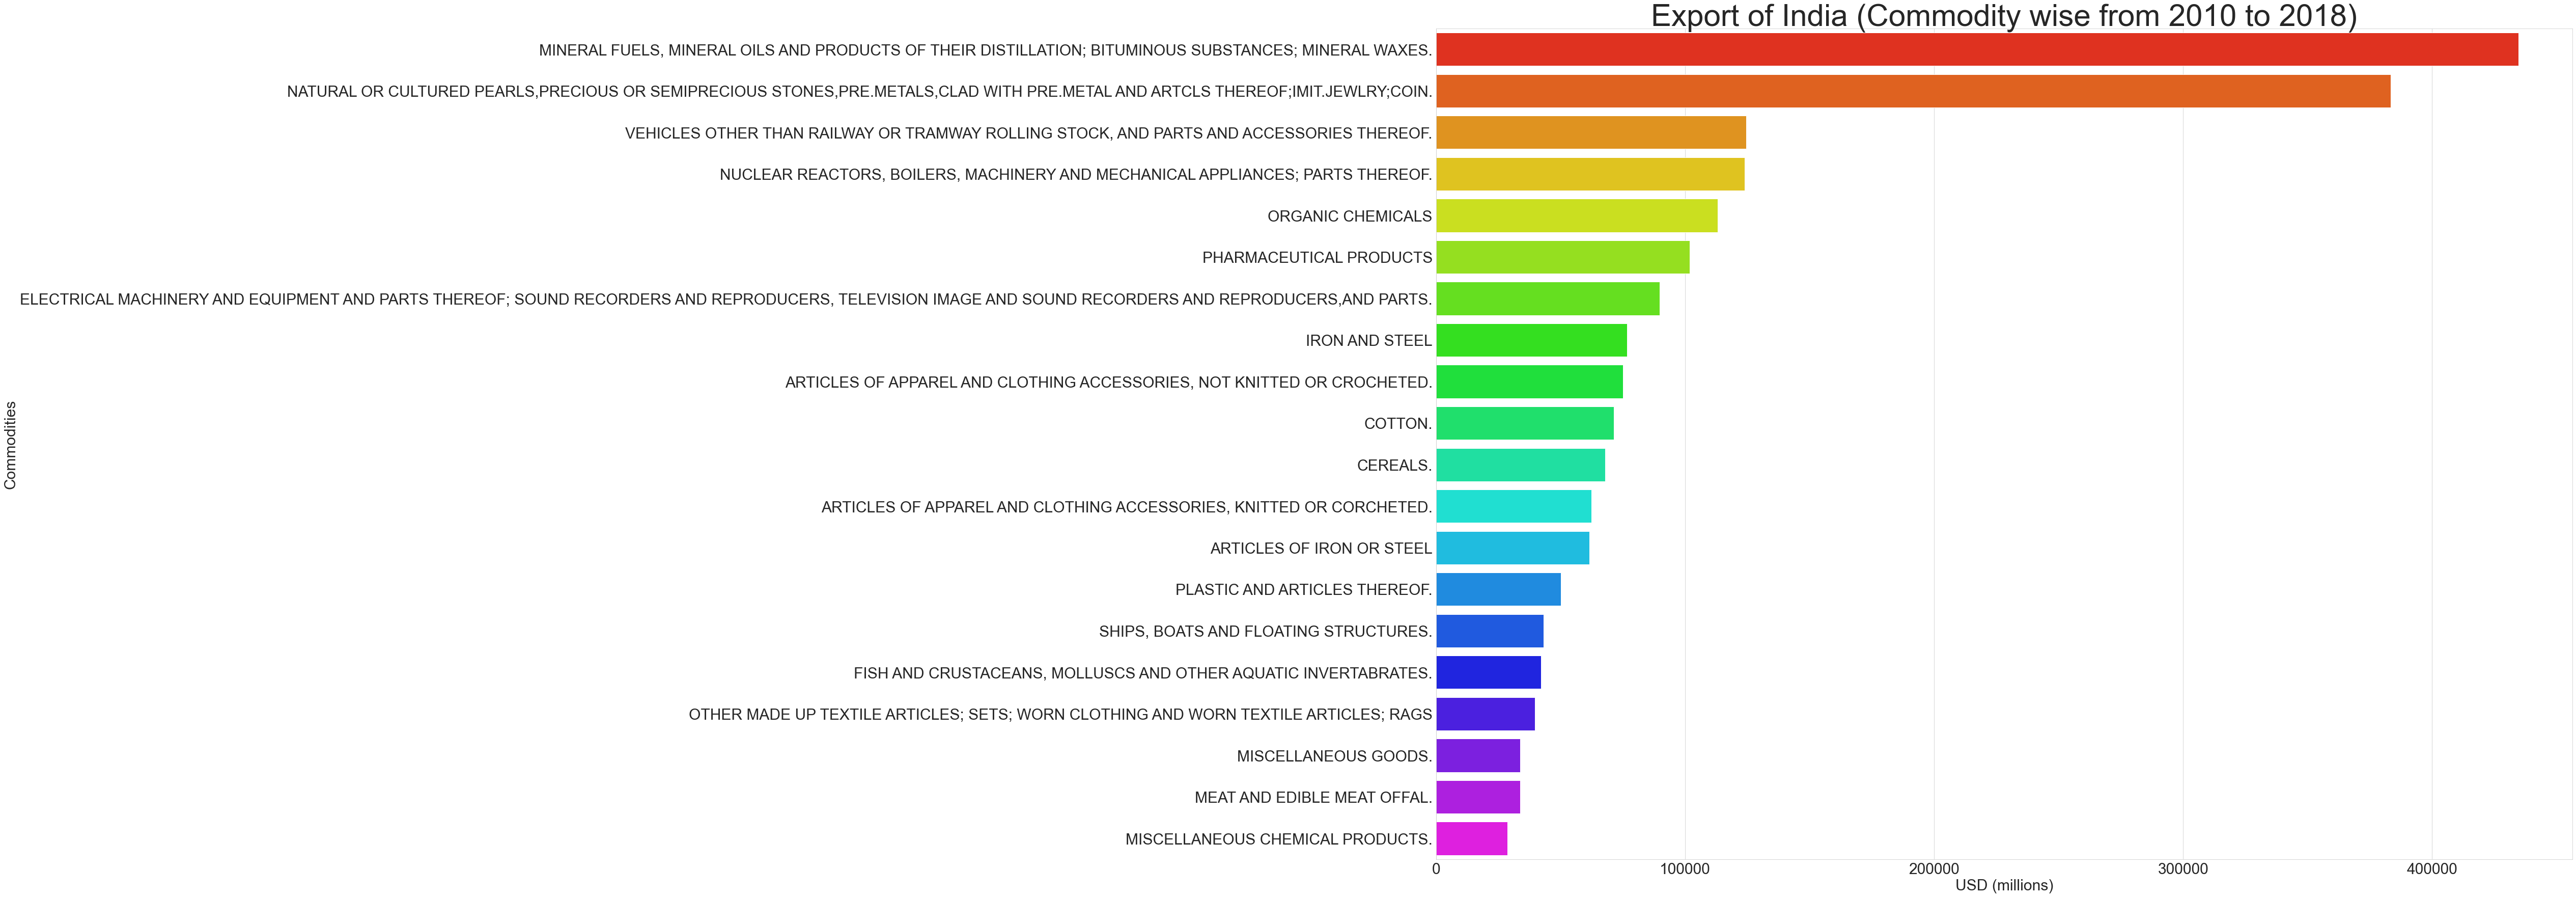

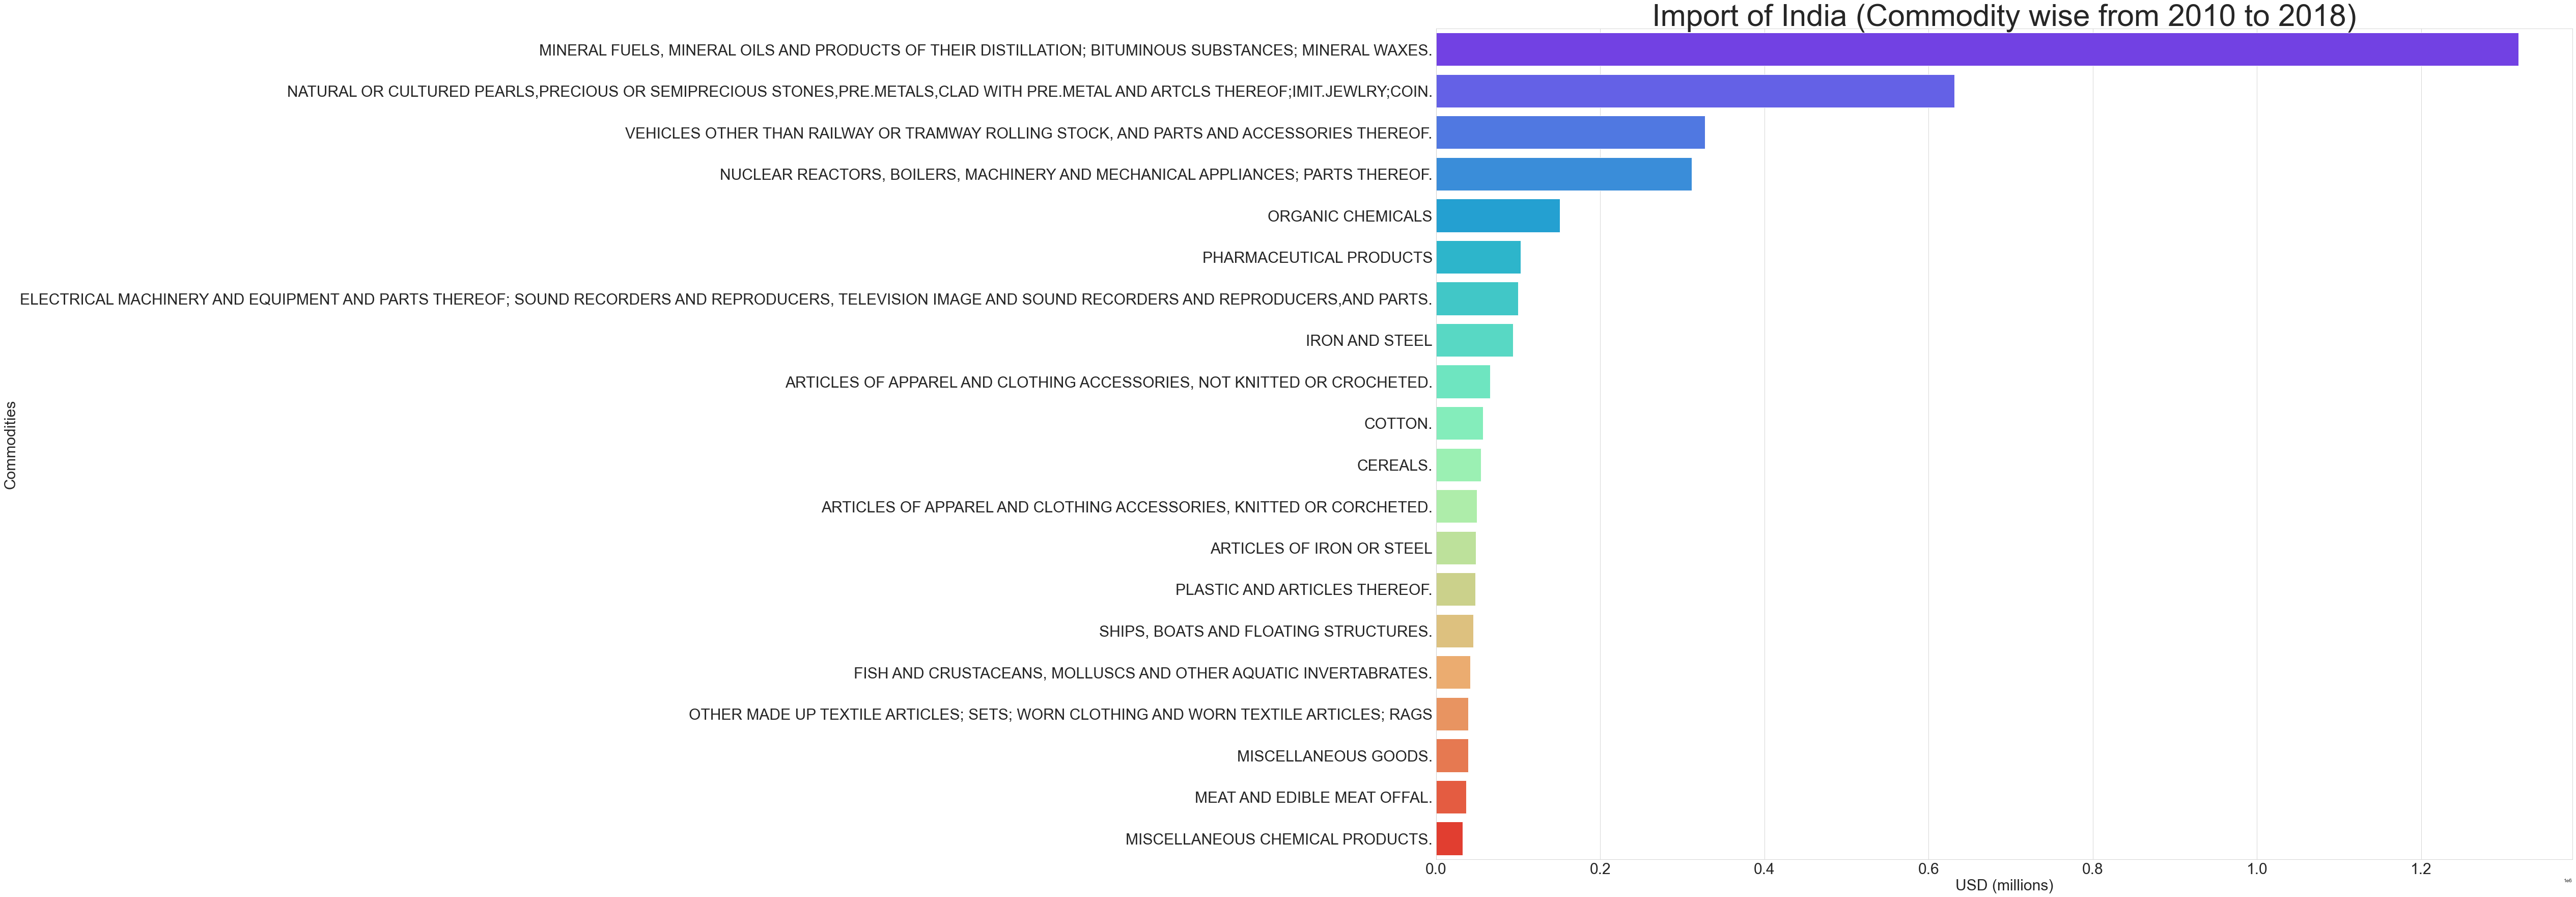

In [18]:
def bar_plot(x,y, xlabel, ylabel, label, color):
    global ax
    font_size = 30
    title_size = 60
    plt.rcParams['figure.figsize'] = (40, 30)
    ax = sns.barplot(x, y, palette = color)
    ax.set_xlabel(xlabel = xlabel, fontsize = font_size)
    ax.set_ylabel(ylabel = ylabel, fontsize = font_size)
    ax.set_title(label = label, fontsize = title_size)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()
    
bar_plot(exp_comm.value, exp_comm.index, 'USD (millions)', 'Commodities', 'Export of India (Commodity wise from 2010 to 2018)', 'gist_rainbow')
bar_plot(imp_comm.value, exp_comm.index, 'USD (millions)', 'Commodities', 'Import of India (Commodity wise from 2010 to 2018)', 'rainbow')

In [16]:
exp_comm_table = pd.pivot_table(df_export, values = 'value', index = 'Commodity', columns = 'year')
imp_comm_table = pd.pivot_table(df_import, values = 'value', index = 'Commodity', columns = 'year')
print('**Commodity Composition of Exports**')
display(exp_comm_table.sample(n=5))
print('**Commodity Composition of Imports**')
display(imp_comm_table.sample(n=5))





**Commodity Composition of Exports**


year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Commodity,,,,,,,,,
"COFFEE, TEA, MATE AND SPICES.",13.892229,18.562061,16.423293,16.644606,17.509451,17.906848,18.410058,18.915200,18.493121
"ESSENTIAL OILS AND RESINOIDS; PERFUMERY, COSMETIC OR TOILET PREPARATIONS.",5.246162,6.880215,8.404121,7.929402,7.767766,7.813421,8.442620,9.798010,10.704819
"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECIFIED OR INCLUDED.",1.273855,1.986915,1.388125,1.541084,1.233333,1.308714,1.107500,1.898125,1.715325
"WOOL, FINE OR COARSE ANIMAL HAIR, HORSEHAIR YARN AND WOVEN FABRIC.",1.875412,2.511609,2.100120,1.878095,2.083882,2.024205,1.932289,2.029383,2.422927
EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,7.417521,7.359781,7.104521,9.482378,8.143034,8.882606,8.630800,8.108509,7.794251


**Commodity Composition of Imports**


year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Commodity,,,,,,,,,
TOBACCO AND MANUFACTURED TOBACCO SUBSTITUTES.,0.886129,1.014324,1.137250,1.023250,1.216500,1.362500,1.339706,1.015897,1.219048
"WADDING, FELT AND NONWOVENS; SPACIAL YARNS; TWINE, CORDAGE, ROPES AND CABLES AND ARTICLES THEREOF.",2.108333,2.616667,3.077458,3.072097,3.785000,4.399559,4.338676,4.688714,5.473182
EXPLOSIVES; PYROTECHNIC PRODUCTS; MATCHES; PYROPHORIC ALLOYS; CERTAIN COMBUSTIBLE PREPARATIONS.,0.517500,0.444545,0.604118,0.865625,0.621765,0.640588,0.655333,0.475000,0.594118
"SALT; SULPHUR; EARTHS AND STONE; PLASTERING MATERIALS, LIME AND CEMENT.",17.861165,31.902991,30.915306,24.675313,27.449899,25.125370,22.403299,25.155800,28.775455
VEGETABLE PLAITING MATERIALS; VEGETABLE PRODUCTS NOT ELSEWHERE SPECIFIED OR INCLUDED.,0.358261,0.640526,0.616250,0.691905,1.610714,1.299130,2.087222,2.165882,2.644737


**Trend of the Most Exporting Goods(In Values) From 2010 to 2018**


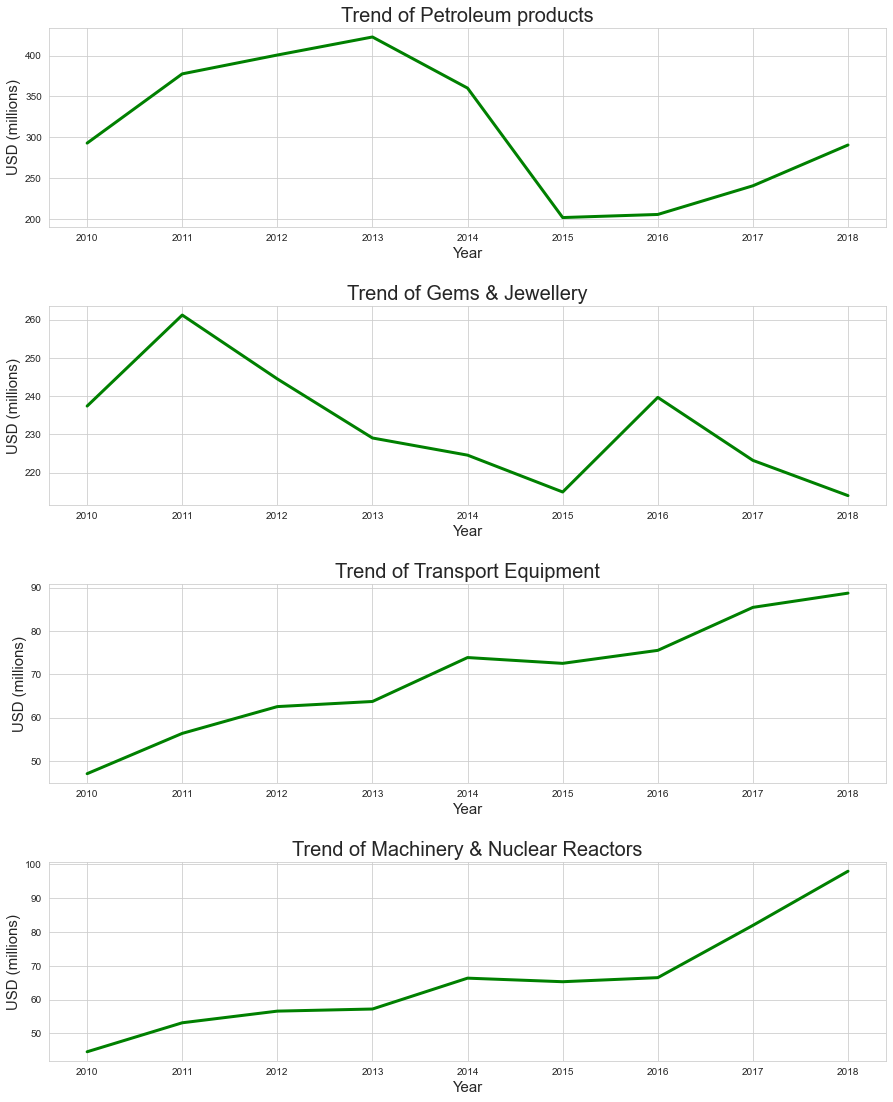

In [36]:
print('**Trend of the Most Exporting Goods(In Values) From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = exp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='green', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Petroleum products', size = 20)

plt.subplot(412)
g1 = exp_comm_table.loc["NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."].plot(color='green', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Gems & Jewellery', size = 20)

plt.subplot(413)
g2 = exp_comm_table.loc["VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF."].plot(color='green', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Transport Equipment', size = 20)


plt.subplot(414)
g3 = exp_comm_table.loc["NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."].plot(color='green', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Machinery & Nuclear Reactors', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

## Analysis:
- The trend of petroleums products shows a perceptible shift between 2010 to 2018. The exports of petroleums products was significant decline from 2013 to 2015.
- The exports of Gems & Jewellery also shows major decline.
- The exports of Transport Equipment and Machinery & Nuclear Reactors shows increasing trade.

**Trend of the Most Importing Goods(In Values) From 2010 to 2018**


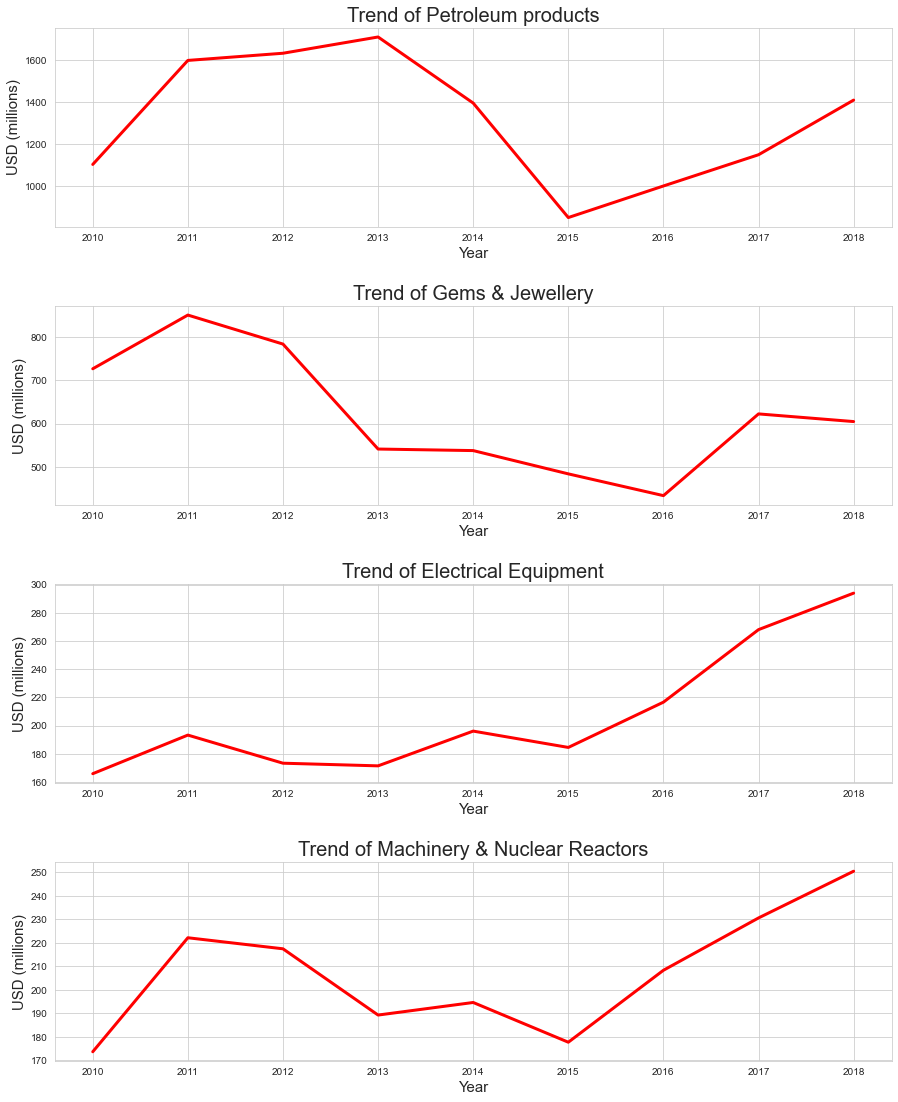

In [34]:
print('**Trend of the Most Importing Goods(In Values) From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = imp_comm_table.loc["MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES."].plot(color='red', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Petroleum products', size = 20)

plt.subplot(412)
g1 = imp_comm_table.loc["NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN."].plot(color='red', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Gems & Jewellery', size = 20)

plt.subplot(413)
g2 = imp_comm_table.loc["ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS."].plot(color='red', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Electrical Equipment', size = 20)


plt.subplot(414)
g3 = imp_comm_table.loc["NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF."].plot(color='red', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Machinery & Nuclear Reactors', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

## Analysis
- The imports of petroleums products was significant decline from 2013 to 2015. Afterwards it showing inceasing trend.
- The imports of Gems and Jewellaries showing decreasing trend.
- From 2010 to 2015, imports of Electrical Equipment and Machinery & Nuclear Reactors was low but after 2015 its shows significant increase.

# Country Wise Analysis:

In [23]:
'''Country export/Import count'''
print('Total number of country Export to:', df_export['country'].nunique())
print('Total number of country Import from:', df_import['country'].nunique())

Total number of country Export to: 248
Total number of country Import from: 241


In [24]:
'''Coverting dataset in Country wise'''
exp_country = df_export.groupby('country').agg({'value':'sum'})
exp_country = exp_country.rename(columns={'value': 'Export'})
exp_country = exp_country.sort_values(by = 'Export', ascending = False)
exp_country = exp_country[:20]

imp_country = df_import.groupby('country').agg({'value':'sum'})
imp_country = imp_country.rename(columns={'value': 'Import'})
imp_country = imp_country.sort_values(by = 'Import', ascending = False)
imp_country = imp_country[:20]

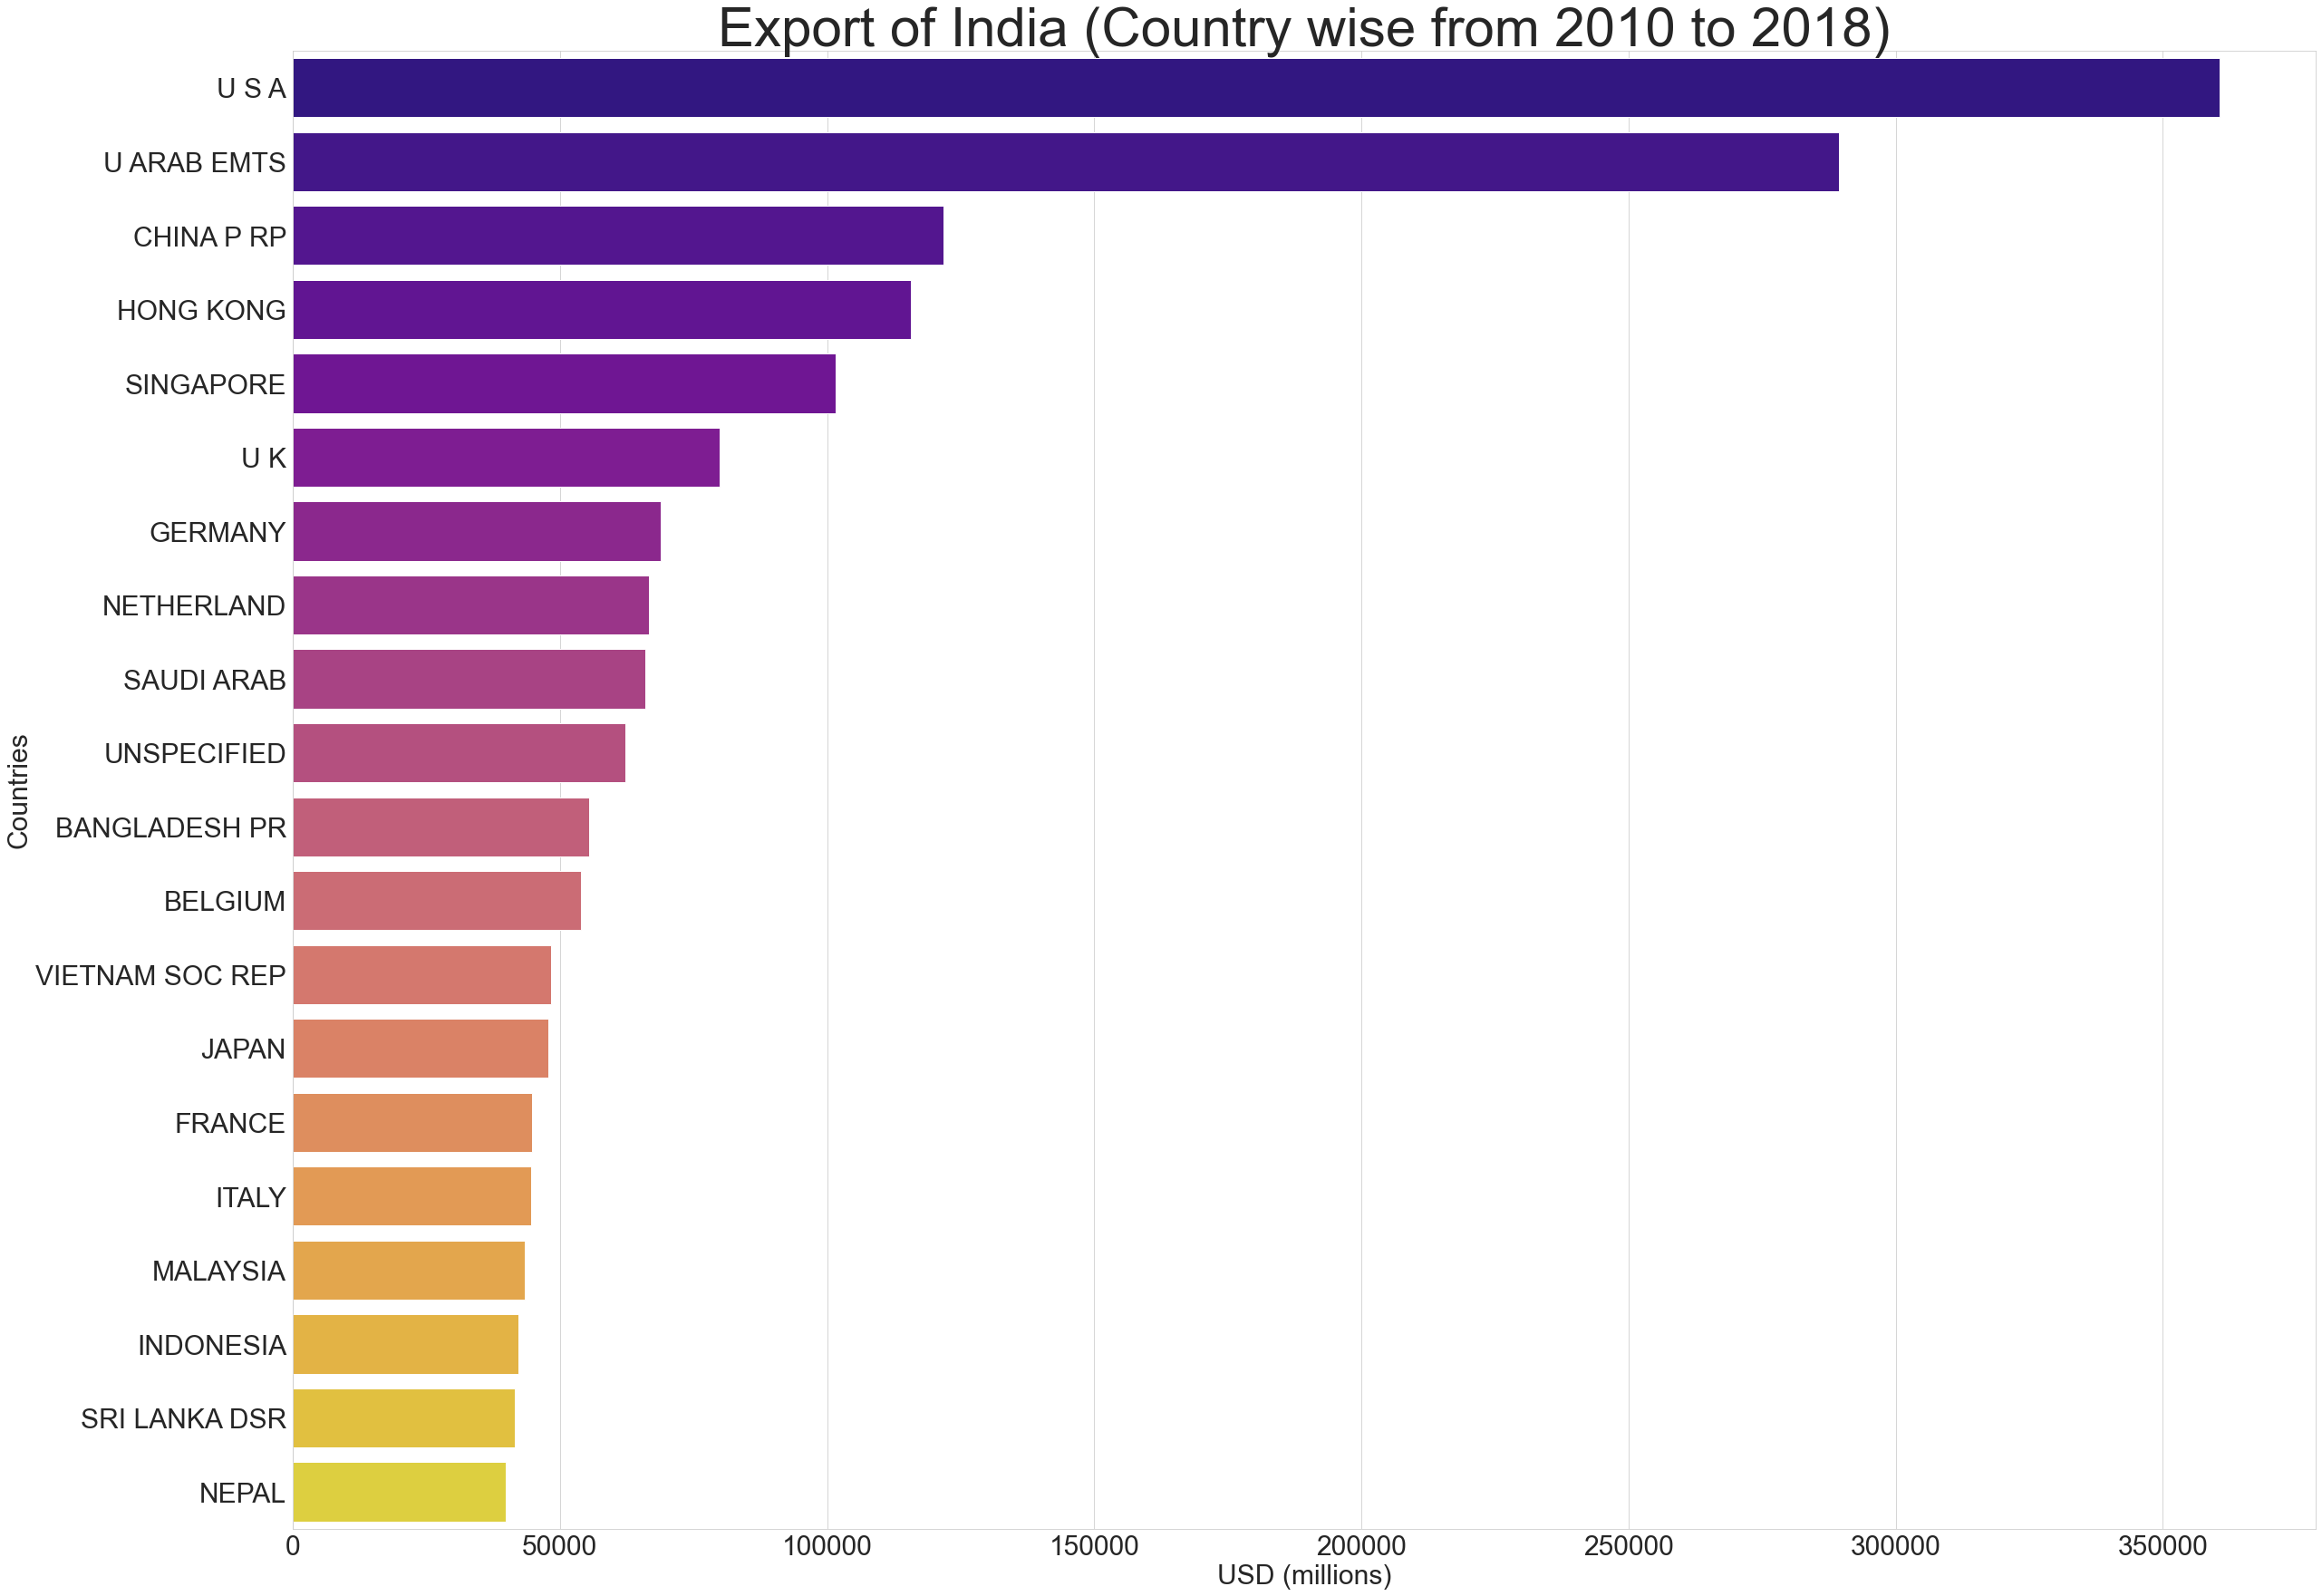

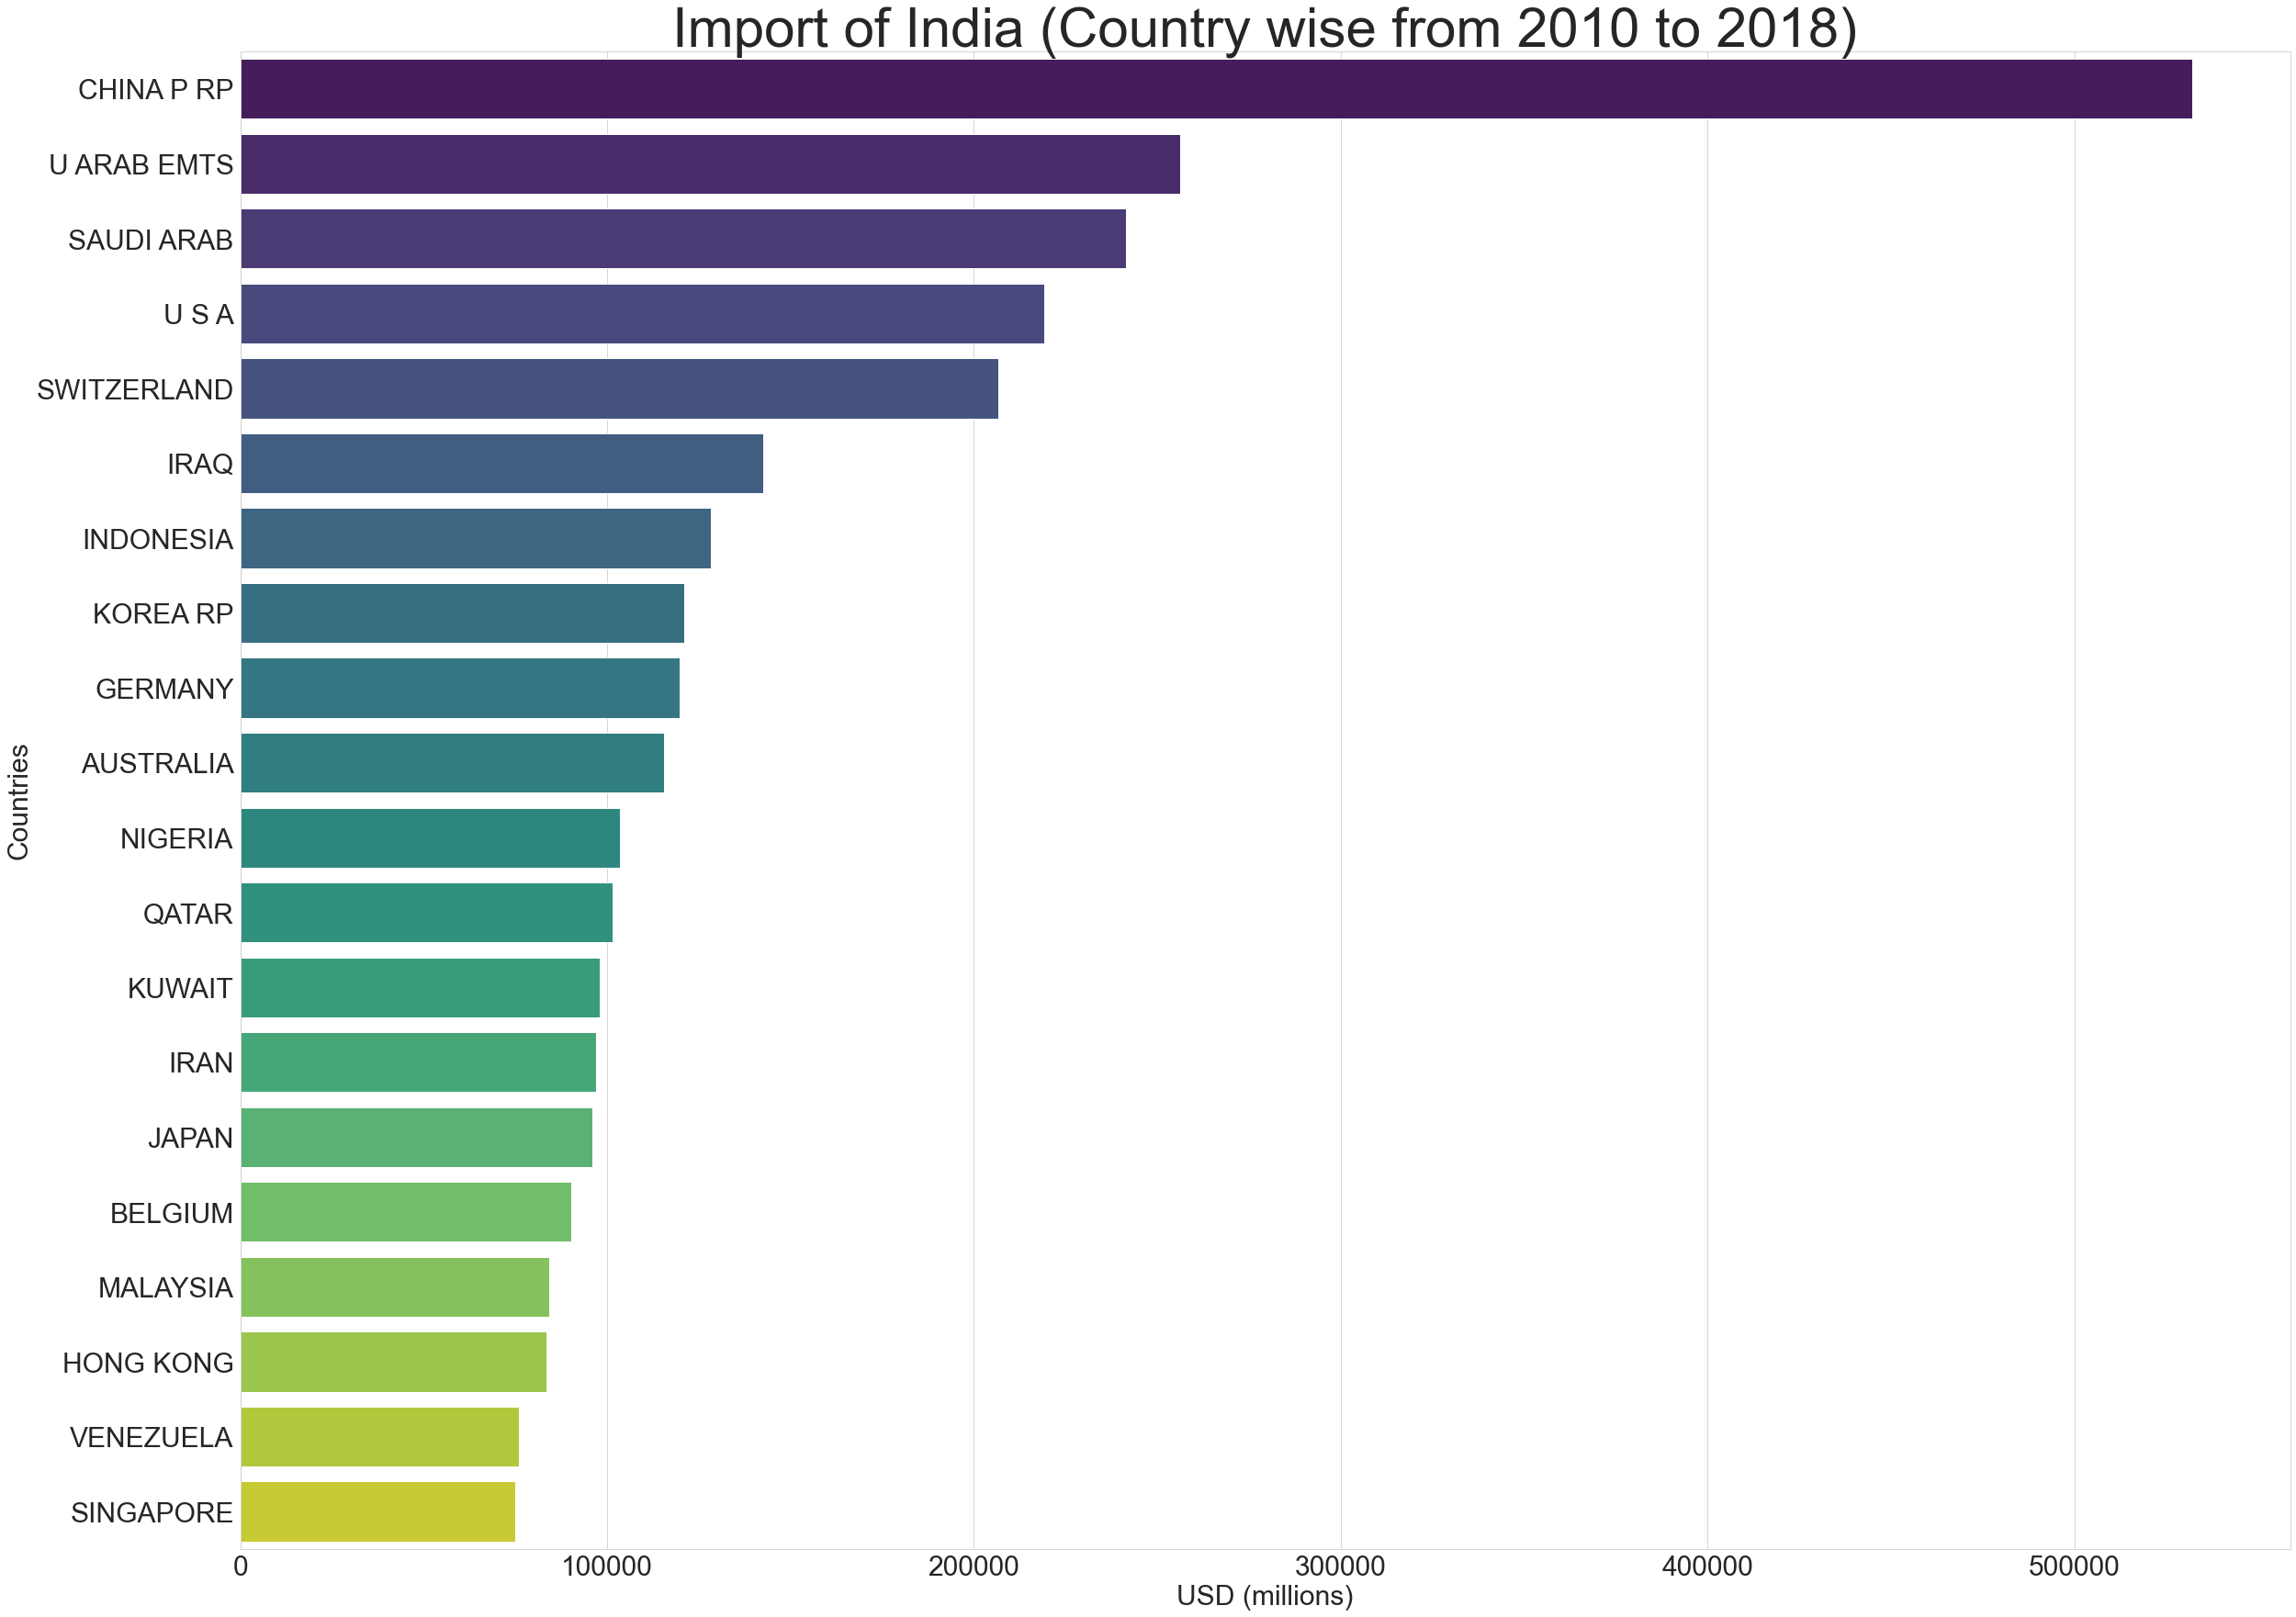

In [25]:
'''Visualization of Export/Import Country wise'''
bar_plot(exp_country.Export, exp_country.index, 'USD (millions)', 'Countries', 'Export of India (Country wise from 2010 to 2018)', 'plasma')
bar_plot(imp_country.Import, imp_country.index, 'USD (millions)', 'Countries', 'Import of India (Country wise from 2010 to 2018)', 'viridis')

## Analysis
- China has biggest market in india followed by UAE, Saudi Arabia and USA
- For India, USA is biggest importer followed by UAE and China Republic.

In [27]:
exp_country_table = pd.pivot_table(df_export, values = 'value', index = 'country', columns = 'year')
imp_country_table = pd.pivot_table(df_import, values = 'value', index = 'country', columns = 'year')
print('**Direction of Foreign Trade Export in India**')
display(exp_country_table.sample(n=5))
print('**Direction of Foreign Trade Import in India**')
display(imp_country_table.sample(n=5))

**Direction of Foreign Trade Export in India**


year,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,
MOROCCO,4.031646,4.482169,5.201829,4.701951,3.978415,4.121807,4.346977,4.968161,7.815632
ANTIGUA,0.043182,0.039091,0.067000,0.103810,0.103500,0.098077,0.073333,0.066250,0.086129
JAMAICA,0.377458,0.429355,0.442985,0.565625,0.609194,0.591029,0.651061,0.779701,0.758219
LIBERIA,0.675077,1.140870,1.867206,3.622714,2.828493,1.939710,2.285000,3.478108,2.553571
PAKISTAN IR,23.993647,17.516364,24.579524,25.552247,20.865506,24.393146,20.241667,21.619551,23.482273


**Direction of Foreign Trade Import in India**


year,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,
REUNION,0.522857,0.802286,1.067308,1.036364,1.413125,1.104706,0.731053,1.202667,1.067059
LIBYA,80.755833,7.666000,183.479000,32.251429,4.676000,0.806364,0.827778,6.289375,10.438571
ST KITT N A,NaN,0.045000,0.000000,0.001667,0.060000,0.160000,0.005000,0.000000,0.000000
FAROE IS.,3.680000,0.040000,NaN,0.000000,0.070000,0.020000,0.000000,0.010000,0.015000
COTE D' IVOIRE,7.166857,19.429583,20.221053,16.577778,28.005263,23.852917,18.232400,29.447333,27.410909


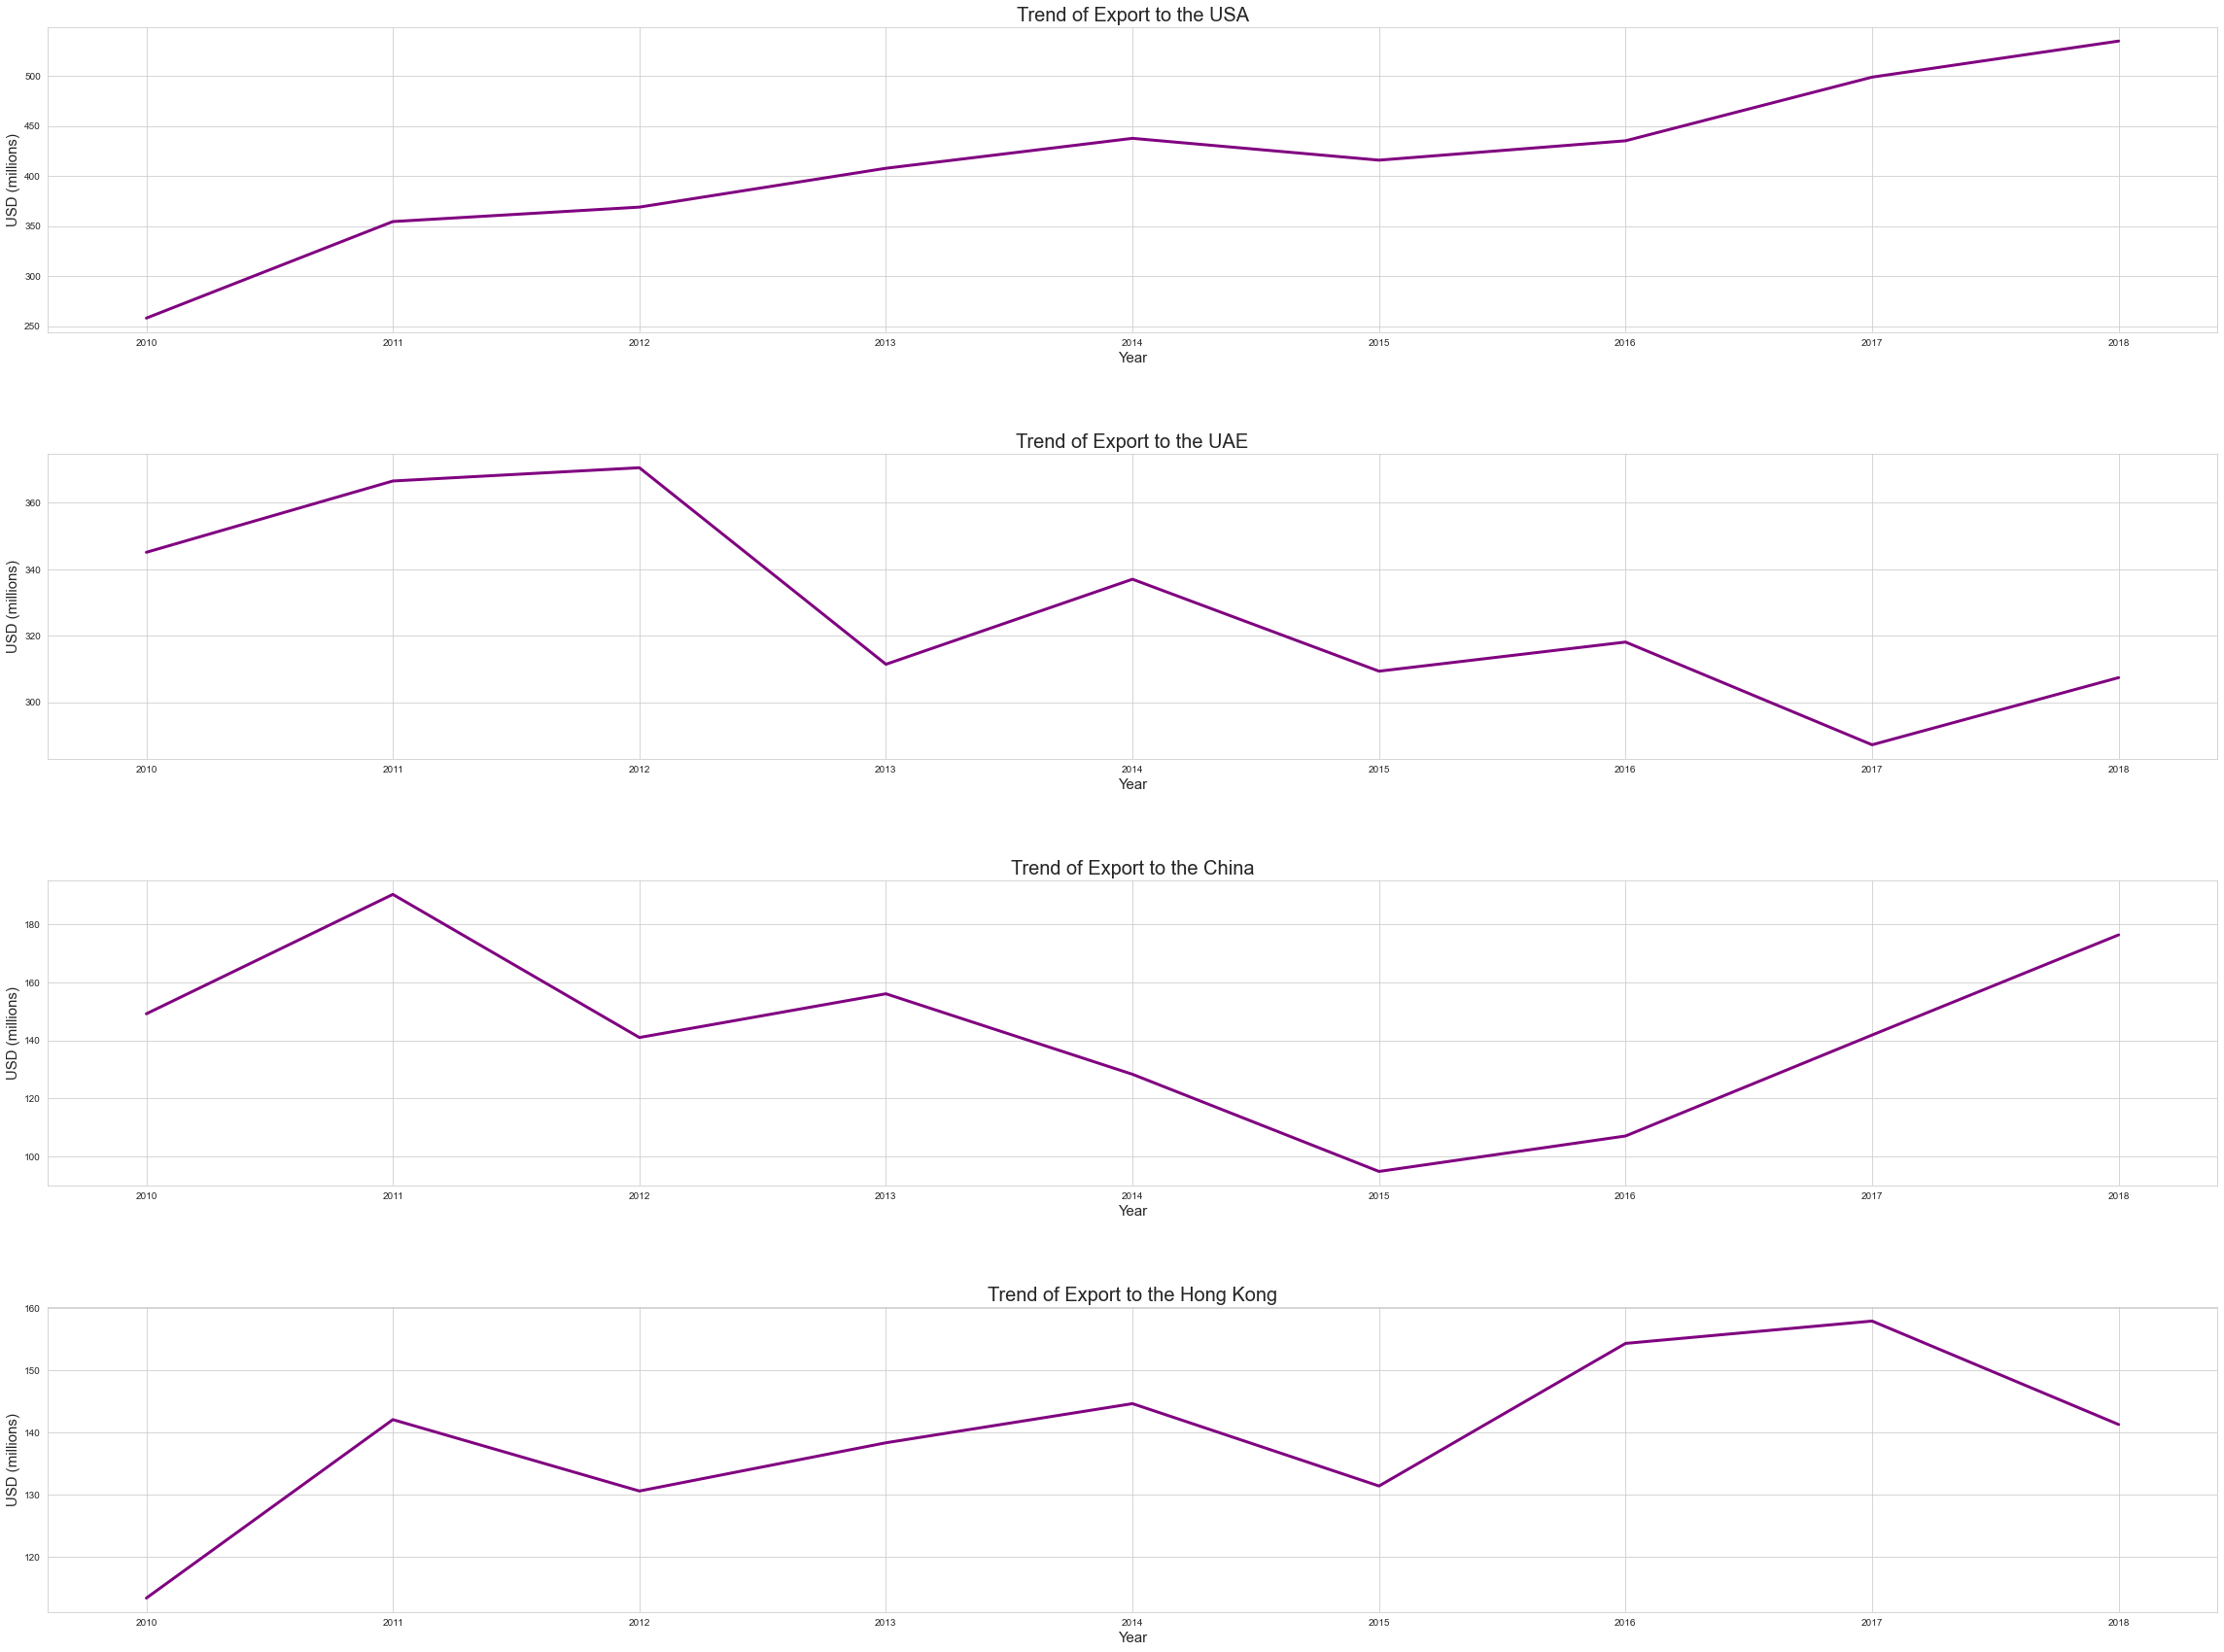

In [35]:
 
plt.subplot(411)
g = exp_country_table.loc["U S A"].plot(color='purple', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Export to the USA', size = 20)

plt.subplot(412)
g1 = exp_country_table.loc["U ARAB EMTS"].plot(color='purple', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Export to the UAE', size = 20)

plt.subplot(413)
g2 = exp_country_table.loc["CHINA P RP"].plot(color='purple', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Export to the China', size = 20)


plt.subplot(414)
g3 = exp_country_table.loc["HONG KONG"].plot(color='purple', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Export to the Hong Kong', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

## Analysis
- Every year India increase her export to the USA, and the USA used to be the major trading partners of India.
- Export to the UAE shows decreasing trend from 2012 to 2017.
- Export to the China also shows decreasing trend from 2011 to 2015, afterwards its start increasing.
- Export to the Hong Kong shows a perceptible shift during the year.

**Trend of the Direction of Foreign Trade Import in India From 2010 to 2018**


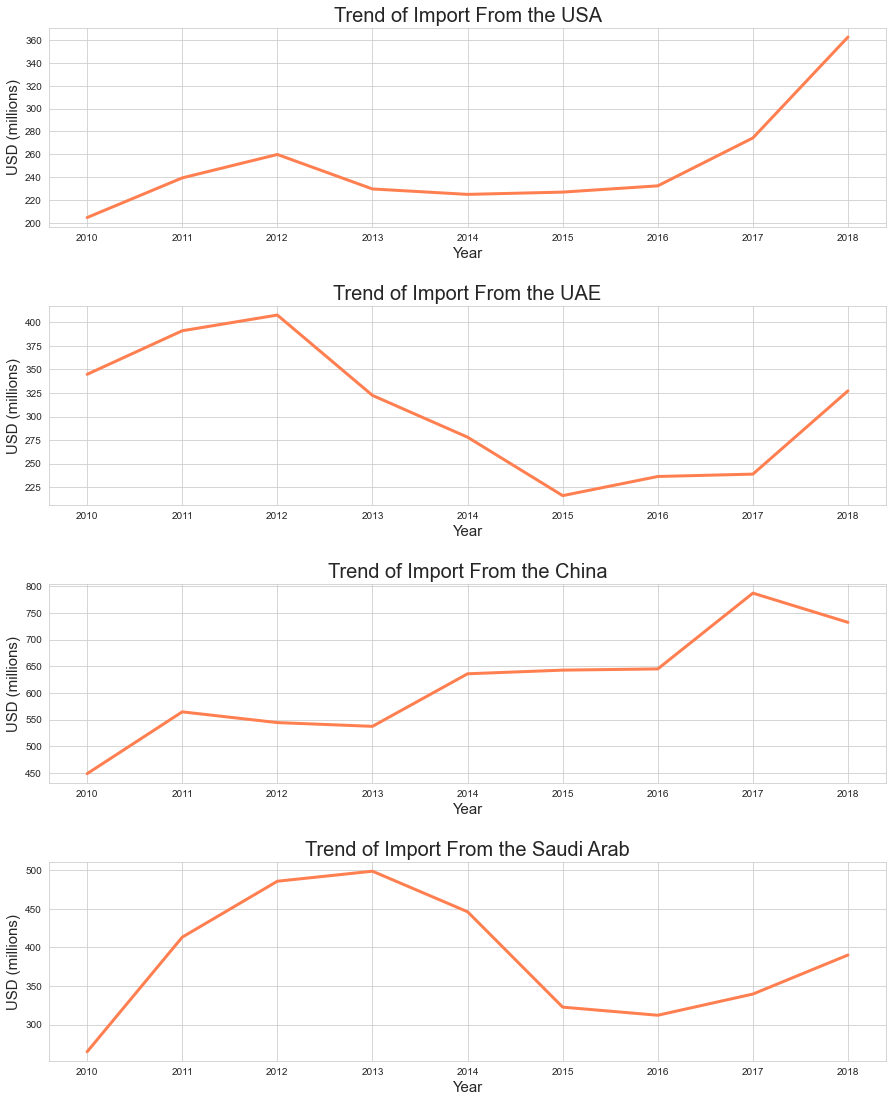

In [38]:
print('**Trend of the Direction of Foreign Trade Import in India From 2010 to 2018**')
plt.figure(figsize=(15,19))
 
plt.subplot(411)
g = imp_country_table.loc["U S A"].plot(color='coral', linewidth=3)
g.set_ylabel('USD (millions)', fontsize = 15)
g.set_xlabel('Year', fontsize = 15)
g.set_title('Trend of Import From the USA', size = 20)

plt.subplot(412)
g1 = imp_country_table.loc["U ARAB EMTS"].plot(color='coral', linewidth=3)
g1.set_ylabel('USD (millions)', fontsize = 15)
g1.set_xlabel('Year', fontsize = 15)
g1.set_title('Trend of Import From the UAE', size = 20)

plt.subplot(413)
g2 = imp_country_table.loc["CHINA P RP"].plot(color='coral', linewidth=3)
g2.set_ylabel('USD (millions)', fontsize = 15)
g2.set_xlabel('Year', fontsize = 15)
g2.set_title('Trend of Import From the China', size = 20)


plt.subplot(414)
g3 = imp_country_table.loc["SAUDI ARAB"].plot(color='coral', linewidth=3)
g3.set_ylabel('USD (millions)', fontsize = 15)
g3.set_xlabel('Year', fontsize = 15)
g3.set_title('Trend of Import From the Saudi Arab', size = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

## Analysis
- From 2010 to 2016, imports from the USA was low, after 2016 impots starts increasing.
- Imports from the UAE and Suadi Arab showing same trend. Imports falls during 2012 to 2015, after 2015 its starts increasing.
- Imports from the china is continueos increasing and the China used to be the major trading partners of India.

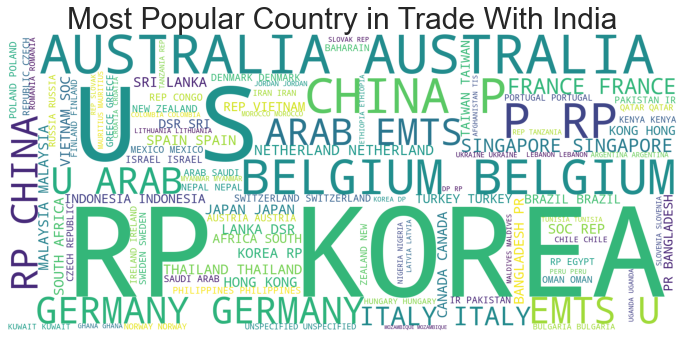

In [49]:
df_final_trade = pd.concat([df_export, df_import])
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color = 'white', width = 1800,  height = 800, max_words = 100).generate(' '.join(df_final_trade['country']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Country in Trade With India',fontsize = 30)
plt.show()

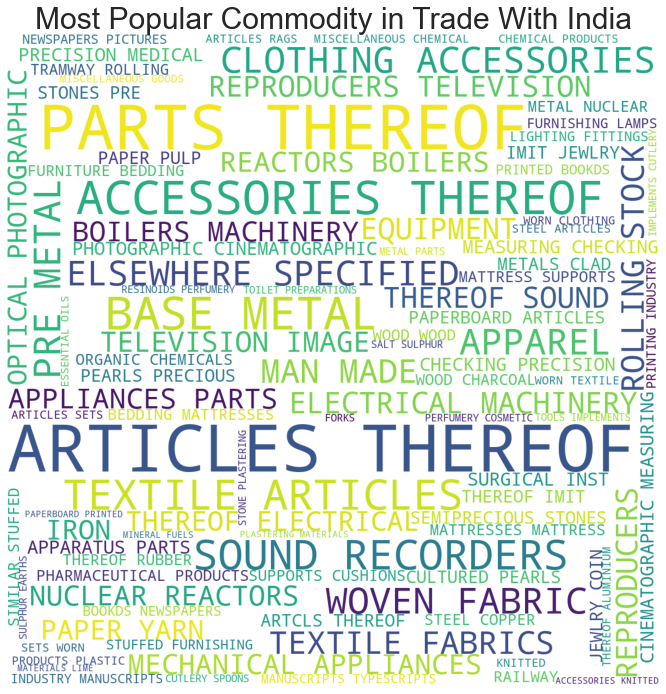

In [48]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (12, 12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 100).generate(' '.join(df_final_trade['Commodity']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Commodity in Trade With India',fontsize = 30)
plt.show()